## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

## Load Data into DataFrame (Spotify_Youtube)

In [4]:

dataset = 'Spotify_Youtube.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('Spotify_Youtube.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

## Initial Data Cleaning

In [6]:
# Deleting useless columns
df = df.drop(columns=['Url_spotify', 'Uri', 'Url_youtube', 'Description', 'Licensed', 'official_video', 'Title'])
print(df.head(5))

   Unnamed: 0    Artist                                          Track  \
0           0  Gorillaz                                 Feel Good Inc.   
1           1  Gorillaz                                Rhinestone Eyes   
2           2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3           3  Gorillaz                             On Melancholy Hill   
4           4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   

   Energy   Key  Loudness  Speechiness  ...  Instrumentalness  Liveness  \
0   0.705   6.0  

In [7]:
# Check for missing values in each column
print(df.isnull().sum())

Unnamed: 0            0
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Stream              576
dtype: int64


In [8]:
# Deleting rows with missing values
df = df.dropna(subset=['Danceability', 'Views', 'Likes', 'Comments', 'Stream'])
print(df.isnull().sum())

Unnamed: 0          0
Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Stream              0
dtype: int64


In [9]:
# Check the number of rows before removing duplicates
initial_row_count = df.shape[0]

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Check the number of rows after removing duplicates
final_row_count = df.shape[0]

In [12]:
# Amount of removed duplicates
duplicates_removed = initial_row_count - final_row_count
print(f"Duplicates removed: {duplicates_removed}")

Duplicates removed: 0


## Check for Outliers

In [13]:
import numpy as np
from scipy import stats

# Calculate Z-scores for all numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = stats.zscore(df[numeric_columns])

outliers = np.abs(z_scores) > 3
outliers_count = pd.DataFrame(outliers, columns=numeric_columns).sum()

print(outliers_count)

Unnamed: 0            0
Danceability         95
Energy                0
Key                   0
Loudness            456
Speechiness         332
Acousticness          0
Instrumentalness    926
Liveness            584
Valence               0
Tempo                28
Duration_ms          67
Views               340
Likes               364
Comments             80
Stream              507
dtype: int64


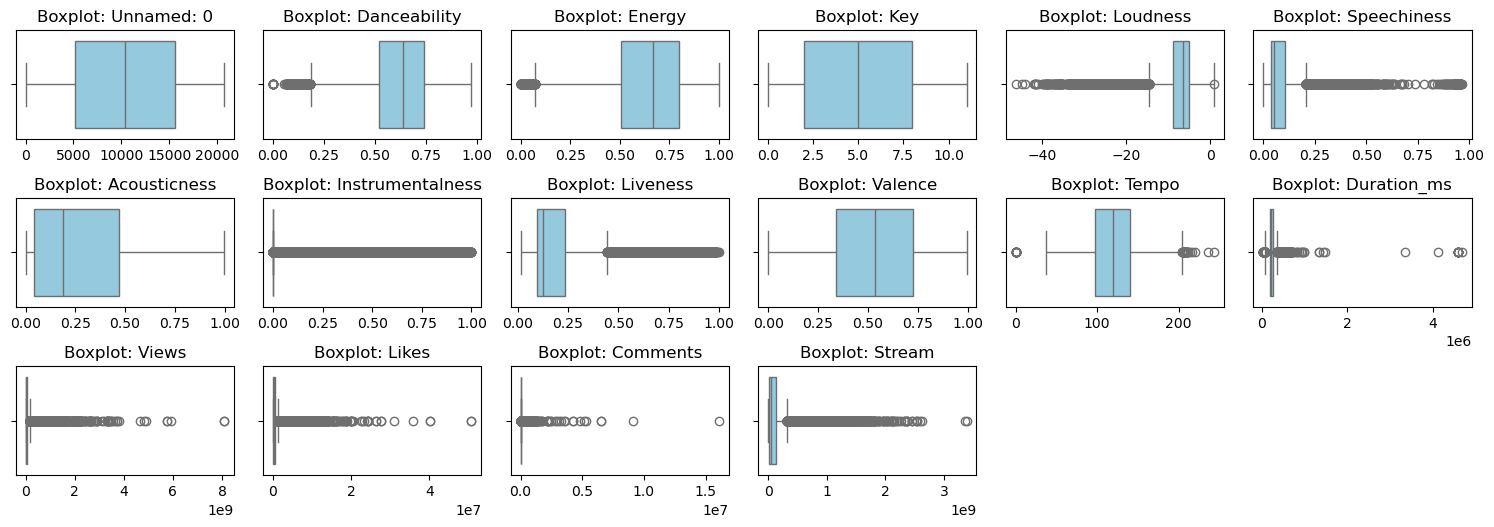

In [14]:
# Visualize outliers with Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 6, i) 
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f"Boxplot: {column}")
    plt.xlabel("")
plt.tight_layout()
plt.show()

In [15]:
# df is our original DataFrame

# Calculate Z-scores for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = stats.zscore(df[numeric_columns])

# Identify outliers (absolute Z-score > 3)
outliers = np.abs(z_scores) > 3

# Create a mask for rows with any outliers
rows_with_outliers = outliers.any(axis=1)

# DataFrame with outliers
df_outliers = df[rows_with_outliers]

# DataFrame without outliers
df_no_outliers = df[~rows_with_outliers]

# Display shapes to confirm split
print(f"Rows with outliers: {df_outliers.shape[0]}")
print(f"Rows without outliers: {df_no_outliers.shape[0]}")

Rows with outliers: 2687
Rows without outliers: 16862


## Initial EDA

### Album Types

In [16]:
# all jobs EDA
df.Album_type.value_counts().head(10)

Album_type
album          14148
single          4689
compilation      712
Name: count, dtype: int64

### EDA with outliers

In [ ]:
# Divide columns into categories
audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
                  'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
metadata = ['Key', 'Duration_ms']
engagement_metrics = ['Views', 'Likes', 'Comments', 'Stream']

# Audio Features Descriptive statistics
print("Audio Features:")
print(df_outliers[audio_features].describe(), "\n")


Audio Features:
       Danceability       Energy     Loudness  Speechiness  Acousticness  \
count   2687.000000  2687.000000  2687.000000  2687.000000   2687.000000   
mean       0.539998     0.538008   -11.559694     0.134184      0.421098   
std        0.212701     0.297446     8.777636     0.187667      0.363379   
min        0.000000     0.000020   -46.251000     0.000000      0.000001   
25%        0.399000     0.312000   -15.376500     0.038300      0.071700   
50%        0.575000     0.604000    -7.850000     0.051400      0.321000   
75%        0.704000     0.784000    -5.485500     0.110000      0.801000   
max        0.967000     1.000000     0.920000     0.964000      0.996000   

       Instrumentalness     Liveness     Valence        Tempo  
count       2687.000000  2687.000000  2687.00000  2687.000000  
mean           0.308133     0.306738     0.42564   117.002098  
std            0.407929     0.299522     0.26968    33.488981  
min            0.000000     0.018200     0.

In [ ]:
# Metadata Descriptive statistics
print("Metadata:")
print(df_outliers[metadata].describe(), "\n")

Metadata:
               Key   Duration_ms
count  2687.000000  2.687000e+03
mean      5.241533  2.436803e+05
std       3.512569  3.053739e+05
min       0.000000  3.100000e+04
25%       2.000000  1.670560e+05
50%       5.000000  2.078530e+05
75%       8.000000  2.538470e+05
max      11.000000  4.676058e+06 



In [ ]:
# Engagement Metrics Descriptive statistics

print("Engagement Metrics:")
print(df_outliers[engagement_metrics].describe(), "\n")

Engagement Metrics:
              Views         Likes      Comments        Stream
count  2.687000e+03  2.687000e+03  2.687000e+03  2.687000e+03
mean   3.003031e+08  2.061018e+06  1.093228e+05  3.206193e+08
std    6.510007e+08  4.190106e+06  5.136037e+05  5.167632e+08
min    2.600000e+01  0.000000e+00  0.000000e+00  6.574000e+03
25%    4.367535e+05  6.046500e+03  1.430000e+02  1.405755e+07
50%    1.145597e+07  1.091430e+05  3.040000e+03  4.874639e+07
75%    2.546572e+08  2.257040e+06  5.554150e+04  3.742498e+08
max    8.079649e+09  5.078865e+07  1.608314e+07  3.386520e+09 



### EDA without outliers

In [ ]:
# Categories of columns
audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
                  'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
metadata = ['Key', 'Duration_ms']
engagement_metrics = ['Views', 'Likes', 'Comments', 'Stream']

# Audio Features Descriptive statistics
print("Audio Features:")
print(df_no_outliers[audio_features].describe(), "\n")


Audio Features:
       Danceability        Energy      Loudness   Speechiness  Acousticness  \
count  16862.000000  16862.000000  16862.000000  16862.000000  16862.000000   
mean       0.633977      0.650653     -7.007479      0.089211      0.268073   
std        0.152741      0.192445      3.100193      0.084841      0.265550   
min        0.130000      0.025200    -21.472000      0.022000      0.000002   
25%        0.534000      0.526000     -8.390000      0.035225      0.041325   
50%        0.647000      0.672000     -6.382000      0.050600      0.177000   
75%        0.747000      0.799000     -4.881250      0.103750      0.435750   
max        0.975000      0.998000      0.829000      0.414000      0.992000   

       Instrumentalness      Liveness       Valence         Tempo  
count      16862.000000  16862.000000  16862.000000  16862.000000  
mean           0.015002      0.172819      0.545413    121.179945  
std            0.068191      0.121993      0.236987     28.914622  


In [ ]:
# Metadata Descriptive statistics

print("Metadata:")
print(df_no_outliers[metadata].describe(), "\n")

Metadata:
                Key    Duration_ms
count  16862.000000   16862.000000
mean       5.302752  221592.124422
std        3.589894   61246.002407
min        0.000000   30985.000000
25%        2.000000  181706.000000
50%        5.000000  213926.500000
75%        8.000000  251707.000000
max       11.000000  601000.000000 



In [ ]:
# Engagement Metrics Descriptive statistics

print("Engagement Metrics:")
print(df_no_outliers[engagement_metrics].describe(), "\n")

Engagement Metrics:
              Views         Likes       Comments        Stream
count  1.686200e+04  1.686200e+04   16862.000000  1.686200e+04
mean   6.281343e+07  4.483944e+05   14883.008777  1.078675e+08
std    1.185770e+08  7.893788e+05   35324.004832  1.469769e+08
min    3.300000e+01  0.000000e+00       0.000000  7.771000e+03
25%    2.233695e+06  2.595825e+04     619.000000  1.843031e+07
50%    1.529583e+07  1.292480e+05    3378.000000  4.999125e+07
75%    6.522871e+07  4.813565e+05   13306.000000  1.308001e+08
max    9.169826e+08  6.079129e+06  609243.000000  8.749106e+08 



### EDA combined (all)

In [ ]:
# Categories of columns
audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
                  'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
metadata = ['Key', 'Duration_ms']
engagement_metrics = ['Views', 'Likes', 'Comments', 'Stream']

# Audion Features Descriptive statistics
print("Audio Features:")
print(df[audio_features].describe(), "\n")


Audio Features:
       Danceability        Energy      Loudness   Speechiness  Acousticness  \
count  19549.000000  19549.000000  19549.000000  19549.000000  19549.000000   
mean       0.621059      0.635170     -7.633179      0.095392      0.289106   
std        0.165489      0.213555      4.618839      0.106243      0.285908   
min        0.000000      0.000020    -46.251000      0.000000      0.000001   
25%        0.519000      0.508000     -8.772000      0.035700      0.044400   
50%        0.639000      0.666000     -6.516000      0.050700      0.190000   
75%        0.742000      0.797000     -4.929000      0.104000      0.470000   
max        0.975000      1.000000      0.920000      0.964000      0.996000   

       Instrumentalness      Liveness       Valence         Tempo  
count      19549.000000  19549.000000  19549.000000  19549.000000  
mean           0.055292      0.191226      0.528950    120.605702  
std            0.192519      0.165197      0.245228     29.619340  


In [24]:
# Metadata Descriptive statistics

print("Metadata:")
print(df[metadata].describe(), "\n")

Metadata:
                Key   Duration_ms
count  19549.000000  1.954900e+04
mean       5.294337  2.246281e+05
std        3.579338  1.269126e+05
min        0.000000  3.098500e+04
25%        2.000000  1.802400e+05
50%        5.000000  2.132530e+05
75%        8.000000  2.519200e+05
max       11.000000  4.676058e+06 



In [25]:
# Engagement Metrics Descriptive statistics

print("Engagement Metrics:")
print(df[engagement_metrics].describe(), "\n")

Engagement Metrics:
              Views         Likes      Comments        Stream
count  1.954900e+04  1.954900e+04  1.954900e+04  1.954900e+04
mean   9.545626e+07  6.700487e+05  2.786371e+04  1.371101e+08
std    2.775744e+08  1.805054e+06  1.959074e+05  2.463589e+08
min    2.600000e+01  0.000000e+00  0.000000e+00  6.574000e+03
25%    1.911528e+06  2.238000e+04  5.310000e+02  1.781089e+07
50%    1.491440e+07  1.279090e+05  3.343000e+03  4.979139e+07
75%    7.152989e+07  5.266400e+05  1.449300e+04  1.390828e+08
max    8.079649e+09  5.078865e+07  1.608314e+07  3.386520e+09 



In [26]:
# Categories of columns
categories = ['Audio Features', 'Metadata', 'Engagement Metrics']
feature_lists = [
    ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
     'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],  # Audio Features
    ['Key', 'Duration_ms'],  # Metadata
    ['Views', 'Likes', 'Comments', 'Stream']  # Engagement Metrics
]

# Print descriptive statistics for the full dataset, outliers, and non-outliers
dataframes = [
    ('Full Dataset', df),
    ('Outliers Only', df_outliers),
    ('Without Outliers', df_no_outliers)
]

for dataset_name, data in dataframes:
    print(f"Descriptive Statistics for {dataset_name}:\n")
    for category, features in zip(categories, feature_lists):
        print(f"{category}:")
        print(data[features].describe(), "\n")
    print("-" * 50)


Descriptive Statistics for Full Dataset:

Audio Features:
       Danceability        Energy      Loudness   Speechiness  Acousticness  \
count  19549.000000  19549.000000  19549.000000  19549.000000  19549.000000   
mean       0.621059      0.635170     -7.633179      0.095392      0.289106   
std        0.165489      0.213555      4.618839      0.106243      0.285908   
min        0.000000      0.000020    -46.251000      0.000000      0.000001   
25%        0.519000      0.508000     -8.772000      0.035700      0.044400   
50%        0.639000      0.666000     -6.516000      0.050700      0.190000   
75%        0.742000      0.797000     -4.929000      0.104000      0.470000   
max        0.975000      1.000000      0.920000      0.964000      0.996000   

       Instrumentalness      Liveness       Valence         Tempo  
count      19549.000000  19549.000000  19549.000000  19549.000000  
mean           0.055292      0.191226      0.528950    120.605702  
std            0.192519   

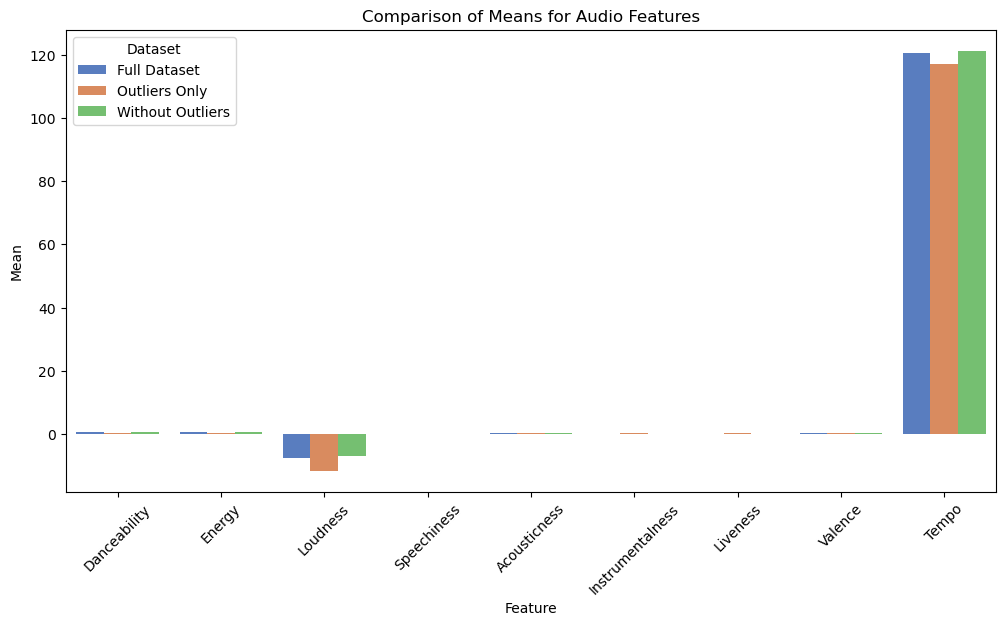

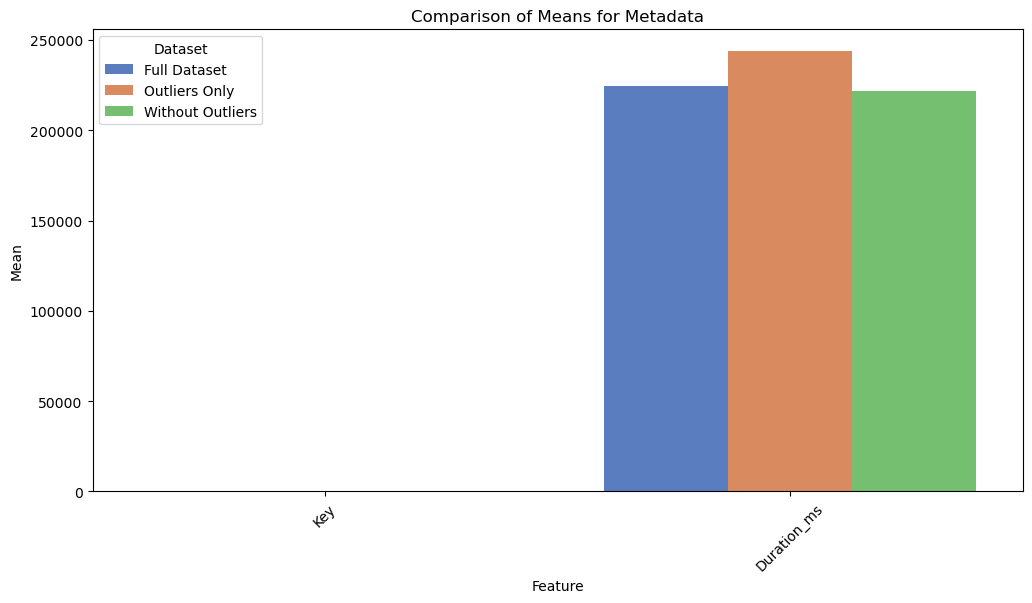

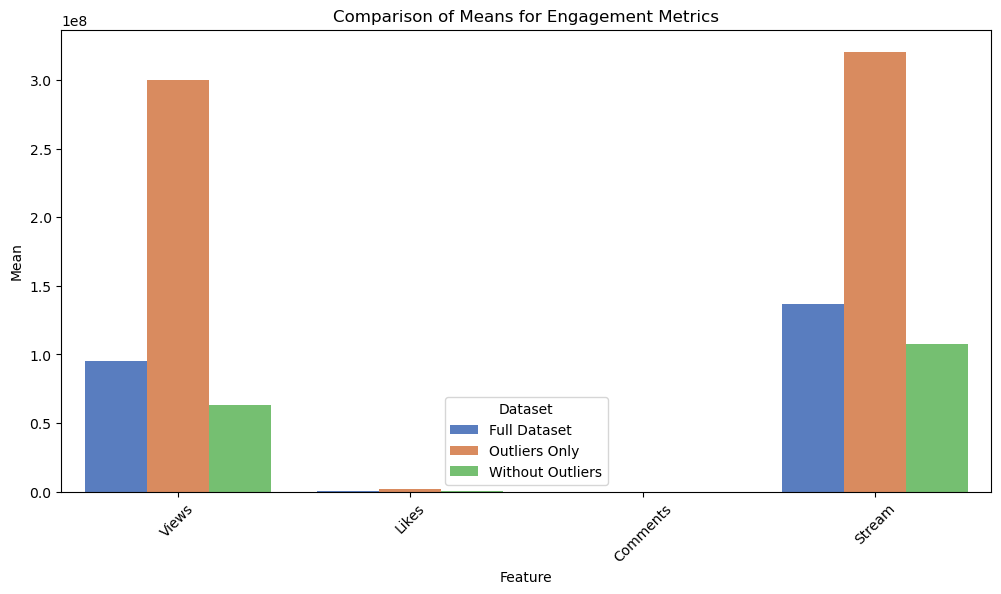

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visualize the mean differences to undestand if it's crucial

# Function to calculate mean for each category and dataset
def calculate_means(df_list, feature_lists, dataset_names):
    mean_dfs = []
    for features, dataset, name in zip(feature_lists, df_list, dataset_names):
        means = dataset[features].mean().reset_index()
        means.columns = ['Feature', 'Mean']
        means['Dataset'] = name
        mean_dfs.append(means)
    return pd.concat(mean_dfs)

# Prepare datasets and feature lists
datasets = [df, df_outliers, df_no_outliers]
dataset_names = ["Full Dataset", "Outliers Only", "Without Outliers"]
feature_lists = [
    ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
     'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],  # Audio Features
    ['Key', 'Duration_ms'],  # Metadata
    ['Views', 'Likes', 'Comments', 'Stream']  # Engagement Metrics
]
categories = ['Audio Features', 'Metadata', 'Engagement Metrics']

# Plot means for each category
for category, features in zip(categories, feature_lists):
    # Calculate means
    mean_df = calculate_means(datasets, [features]*3, dataset_names)

    # Create a grouped bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=mean_df, x='Feature', y='Mean', hue='Dataset', palette='muted')
    plt.title(f"Comparison of Means for {category}")
    plt.xticks(rotation=45)
    plt.ylabel('Mean')
    plt.legend(title='Dataset')
    plt.show()


In [ ]:
# We found that outliers in the Views and Stream columns significantly affect the mean values, while Likes and other audio features remain unaffected. 

# Therefore, we recommend removing outliers from Views and Stream, but keeping the rest of the data intact. 

# This approach will provide a more accurate analysis of engagement metrics while maintaining the integrity of other features.

In [ ]:
import numpy as np
from scipy import stats

# Select relevant columns for outlier detection
outlier_columns = ['Views', 'Stream']

# Calculate Z-scores for the selected columns
z_scores = stats.zscore(df[outlier_columns])

# Identify rows with outliers in Views or Stream
outliers_views_stream = np.abs(z_scores) > 3

# Create a mask to exclude outliers in Views and Stream (keeping Likes and others intact)
mask_no_outliers = ~outliers_views_stream.any(axis=1)

# Create a DataFrame with rows where Views and Stream are not outliers, but all other columns remain
df_no_outliers_views_stream = df[mask_no_outliers]

print(df_no_outliers_views_stream.head())



   Unnamed: 0    Artist                                          Track  \
1           1  Gorillaz                                Rhinestone Eyes   
2           2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3           3  Gorillaz                             On Melancholy Hill   
4           4  Gorillaz                                 Clint Eastwood   
5           5  Gorillaz                                           DARE   

                                           Album Album_type  Danceability  \
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   
5                                     Demon Days      album         0.760   

   Energy   Key  Loudness  Speechiness  ...  Instrumentalness  Liveness  \
1   0.703   8.0  

In [ ]:
# Calculate how many rows were deleted (rows where outliers were present)
rows_deleted = df.shape[0] - df_no_outliers_views_stream.shape[0]

print(f"Number of rows deleted: {rows_deleted}")

Number of rows deleted: 673


In [30]:
# Rename the column 'Unnamed' to 'id'
df_no_outliers_views_stream.rename(columns={df.columns[0]: 'id'}, inplace=True)

print(df_no_outliers_views_stream.head())

   id    Artist                                          Track  \
1   1  Gorillaz                                Rhinestone Eyes   
2   2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3   3  Gorillaz                             On Melancholy Hill   
4   4  Gorillaz                                 Clint Eastwood   
5   5  Gorillaz                                           DARE   

                                           Album Album_type  Danceability  \
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   
5                                     Demon Days      album         0.760   

   Energy   Key  Loudness  Speechiness  ...  Instrumentalness  Liveness  \
1   0.703   8.0    -5.815       0.0302  ...          0.000687    

/var/folders/8m/rtdc6gx16_x4_t0brzgq0m140000gn/T/ipykernel_12661/2970001220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_views_stream.rename(columns={df.columns[0]: 'id'}, inplace=True)


In [31]:
# Final, cleaned dataset
df_no_outliers_views_stream.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18876 entries, 1 to 20717
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18876 non-null  int64  
 1   Artist            18876 non-null  object 
 2   Track             18876 non-null  object 
 3   Album             18876 non-null  object 
 4   Album_type        18876 non-null  object 
 5   Danceability      18876 non-null  float64
 6   Energy            18876 non-null  float64
 7   Key               18876 non-null  float64
 8   Loudness          18876 non-null  float64
 9   Speechiness       18876 non-null  float64
 10  Acousticness      18876 non-null  float64
 11  Instrumentalness  18876 non-null  float64
 12  Liveness          18876 non-null  float64
 13  Valence           18876 non-null  float64
 14  Tempo             18876 non-null  float64
 15  Duration_ms       18876 non-null  float64
 16  Channel           18876 non-null  object 
 17

## Analysis

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 
                   'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 
                   'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']

# Calculate the correlation matrix for the numeric columns
correlation_matrix = df_no_outliers_views_stream[numeric_columns].corr()

print(correlation_matrix)


                  Danceability    Energy       Key  Loudness  Speechiness  \
Danceability          1.000000  0.239050  0.039663  0.357615     0.227090   
Energy                0.239050  1.000000  0.031876  0.746916     0.089717   
Key                   0.039663  0.031876  1.000000  0.027679     0.020241   
Loudness              0.357615  0.746916  0.027679  1.000000     0.069349   
Speechiness           0.227090  0.089717  0.020241  0.069349     1.000000   
Acousticness         -0.281454 -0.663621 -0.032108 -0.554235    -0.100124   
Instrumentalness     -0.322353 -0.318109  0.000919 -0.555860    -0.114026   
Liveness             -0.083380  0.175967 -0.008727  0.088970     0.066704   
Valence               0.464616  0.391165  0.044671  0.318257     0.061089   
Tempo                -0.061642  0.157633  0.004530  0.145174     0.050051   
Duration_ms          -0.088583  0.024274  0.002120  0.012499    -0.049252   
Views                 0.103921  0.095206  0.012057  0.154715    -0.004979   

### Correlation Matrix heatmap

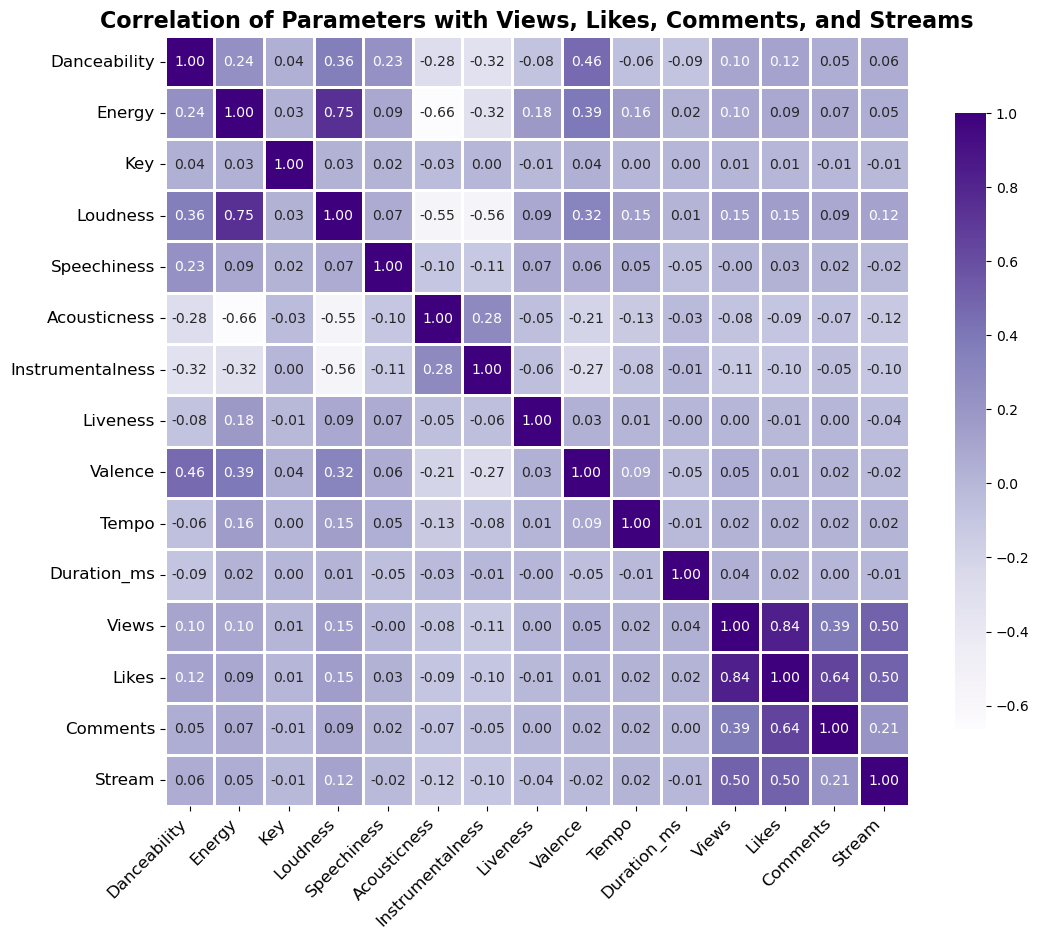

In [ ]:
# Plot the full correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Purples',
    cbar=True,
    cbar_kws={'shrink': 0.8},
    fmt='.2f',
    linewidths=0.8,
    linecolor='white'
)
plt.title("Correlation of Parameters with Views, Likes, Comments, and Streams", 
          fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.show()


### Distribution Analysis of Musical Attributes

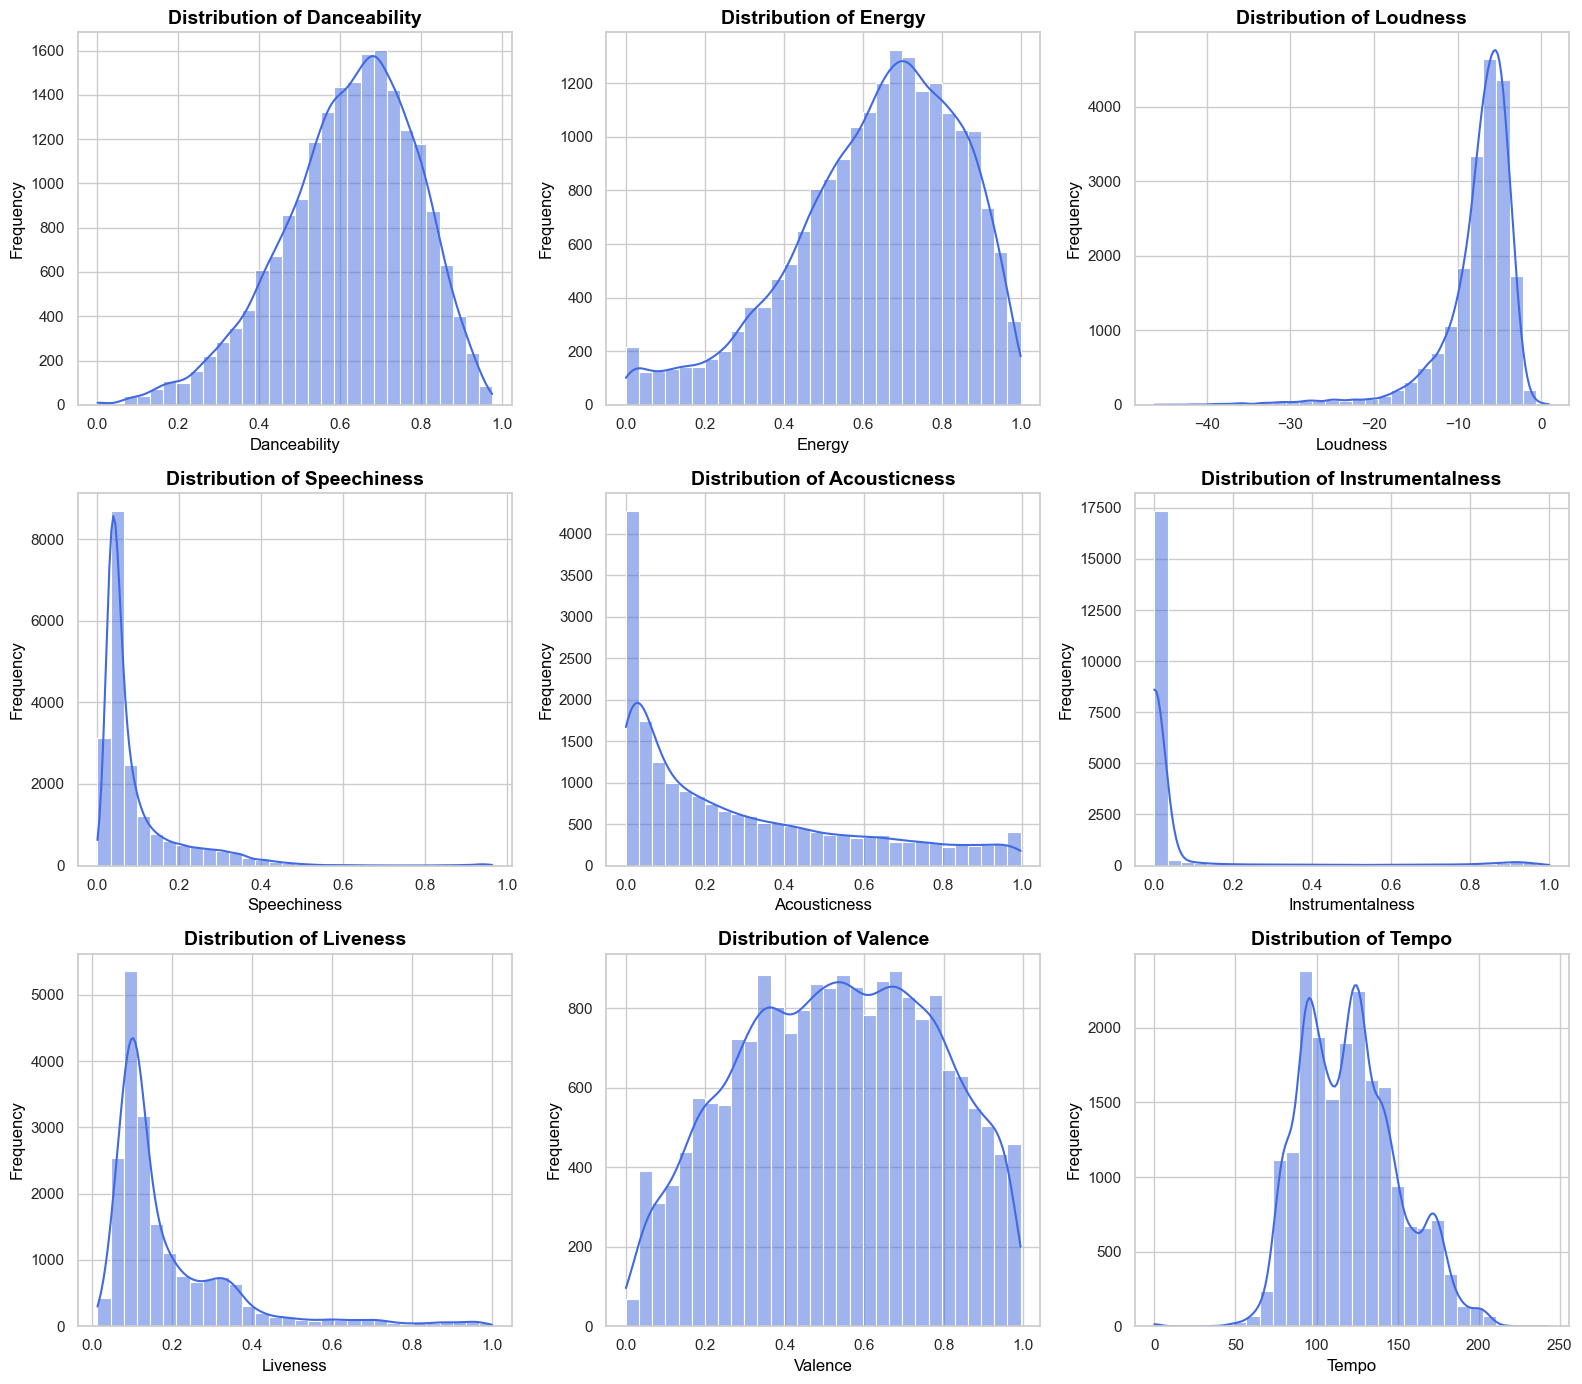

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

columns_to_plot = ['Danceability', 'Energy', 'Loudness', 
                   'Speechiness', 'Acousticness', 'Instrumentalness', 
                   'Liveness', 'Valence', 'Tempo']

plt.figure(figsize=(16, 14))

for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30, color='royalblue')
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold', color='black')
    plt.xlabel(column, fontsize=12, color='black')
    plt.ylabel('Frequency', fontsize=12, color='black')

plt.tight_layout()
plt.show()


### Impact of Engagement Metrics on Music Tracks: A Distributional Analysis

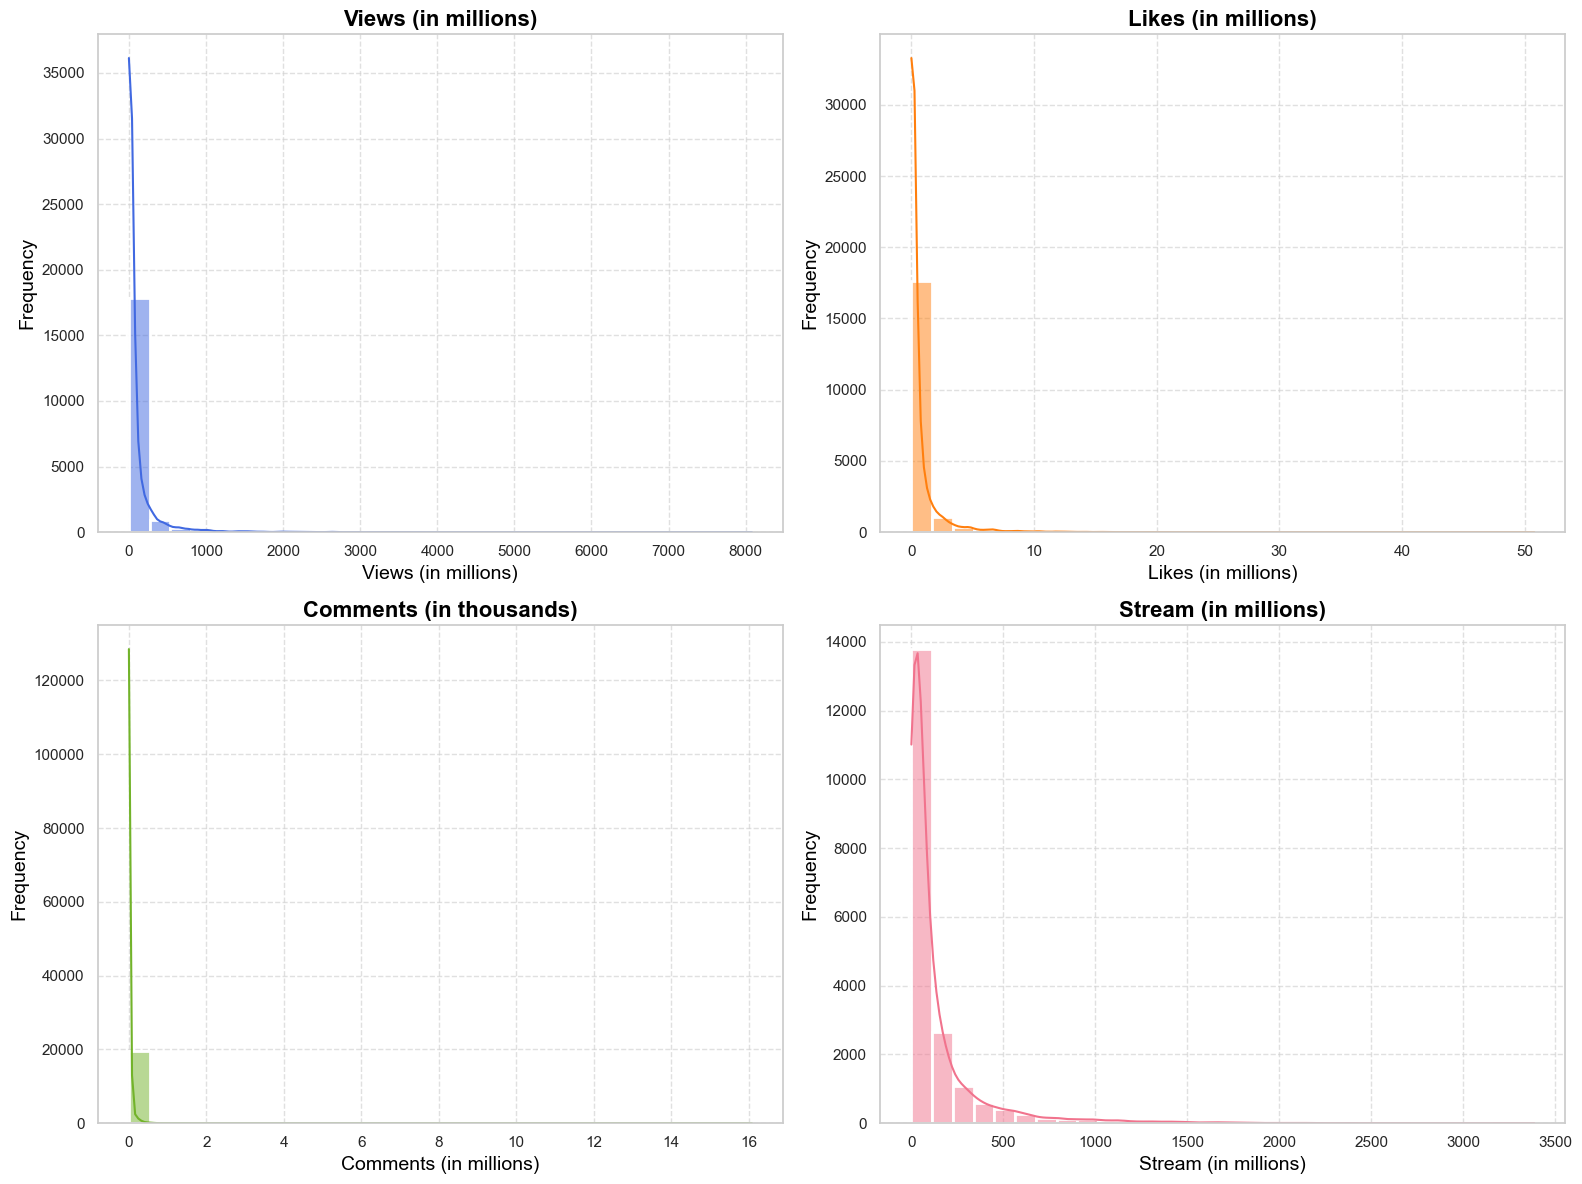

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

columns = ['Views', 'Likes', 'Comments', 'Stream']
titles = ['Views (in millions)', 'Likes (in millions)', 'Comments (in thousands)', 'Stream (in millions)']

colors = ['#4169E1', '#FF7F0E', '#72B32A', '#F1738D']

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[columns[i]] / 1_000_000, kde=True, bins=30, ax=ax, color=colors[i], linewidth=2)
    ax.set_title(titles[i], fontsize=16, fontweight='bold', color='black')
    ax.set_xlabel(f'{columns[i]} (in millions)', fontsize=14, color='black')
    ax.set_ylabel('Frequency', fontsize=14, color='black')
    ax.grid(True, linestyle='--', color='lightgray', alpha=0.7)

plt.tight_layout()
plt.show()


### # Top 10 Artists by Engagement Metrics: Views, Likes, Comments, and Streams

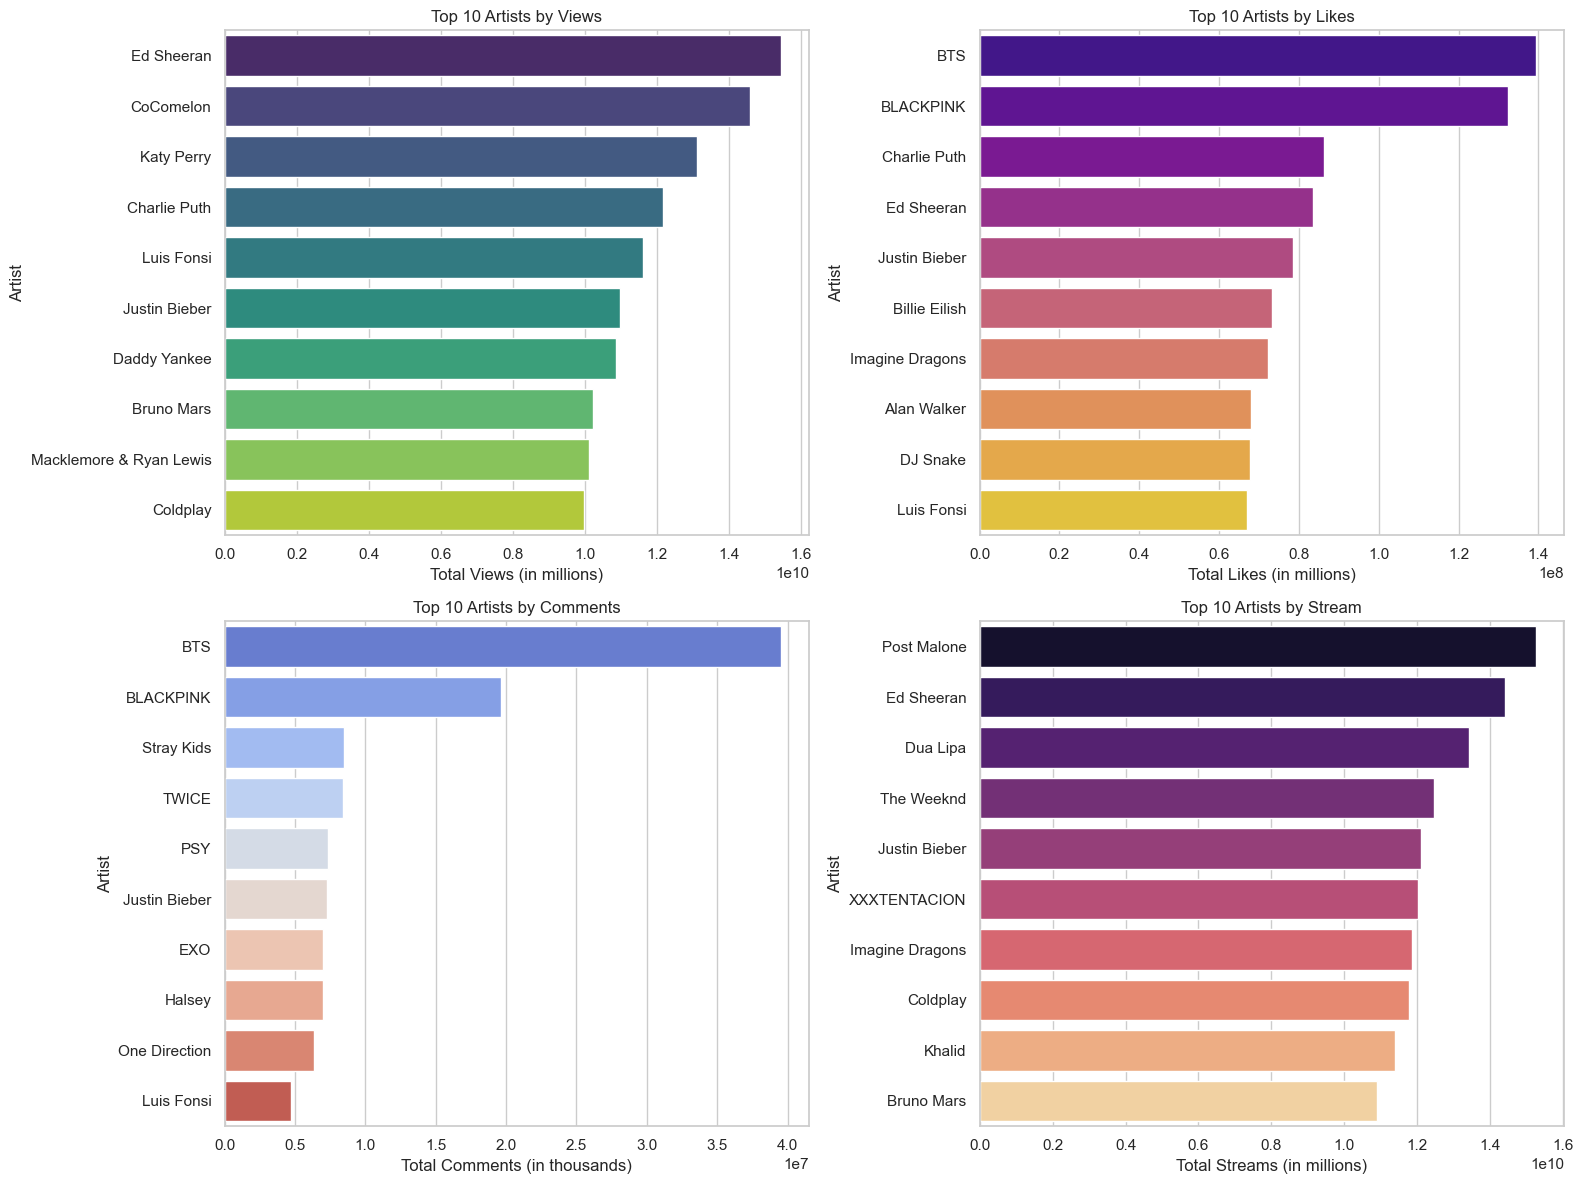

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by artist and calculate the total Views, Likes, Comments, and Streams for each artist
artist_metrics = df.groupby('Artist', as_index=False)[['Views', 'Likes', 'Comments', 'Stream']].sum()

# Sort the artists by each metric and extract the top 10
top_10_views = artist_metrics.sort_values(by='Views', ascending=False).head(10)
top_10_likes = artist_metrics.sort_values(by='Likes', ascending=False).head(10)
top_10_comments = artist_metrics.sort_values(by='Comments', ascending=False).head(10)
top_10_streams = artist_metrics.sort_values(by='Stream', ascending=False).head(10)

# Create a 2x2 grid for the bar plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 artists by Views
sns.barplot(data=top_10_views, x='Views', y='Artist', ax=axes[0, 0], hue='Artist', palette='viridis', dodge=False)
axes[0, 0].set_title("Top 10 Artists by Views")
axes[0, 0].set_xlabel("Total Views (in millions)")
axes[0, 0].set_ylabel("Artist")

# Top 10 artists by Likes
sns.barplot(data=top_10_likes, x='Likes', y='Artist', ax=axes[0, 1], hue='Artist', palette='plasma', dodge=False)
axes[0, 1].set_title("Top 10 Artists by Likes")
axes[0, 1].set_xlabel("Total Likes (in millions)")
axes[0, 1].set_ylabel("Artist")

# Top 10 artists by Comments
sns.barplot(data=top_10_comments, x='Comments', y='Artist', ax=axes[1, 0], hue='Artist', palette='coolwarm', dodge=False)
axes[1, 0].set_title("Top 10 Artists by Comments")
axes[1, 0].set_xlabel("Total Comments (in thousands)")
axes[1, 0].set_ylabel("Artist")

# Top 10 artists by Stream
sns.barplot(data=top_10_streams, x='Stream', y='Artist', ax=axes[1, 1], hue='Artist', palette='magma', dodge=False)
axes[1, 1].set_title("Top 10 Artists by Stream")
axes[1, 1].set_xlabel("Total Streams (in millions)")
axes[1, 1].set_ylabel("Artist")

plt.tight_layout()
plt.show()


### Distribution of Album Types in Music Dataset

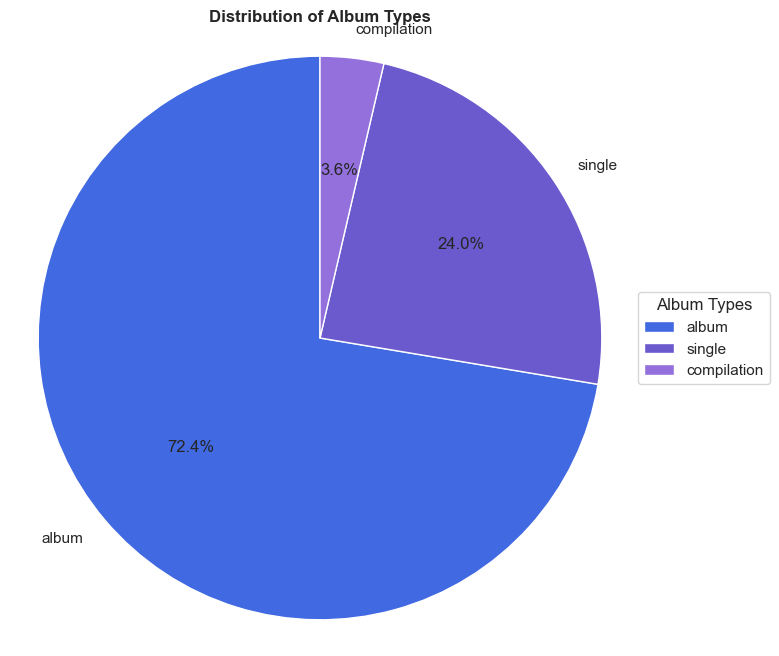

In [75]:
import matplotlib.pyplot as plt

album_type_counts = df['Album_type'].value_counts()

plt.figure(figsize=(8, 8))
colors = ['#4169E1', '#6A5ACD', '#9370DB']
plt.pie(album_type_counts, labels=album_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Album Types', fontweight='bold')
plt.axis('equal')

plt.legend(title='Album Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## Distribution of Key

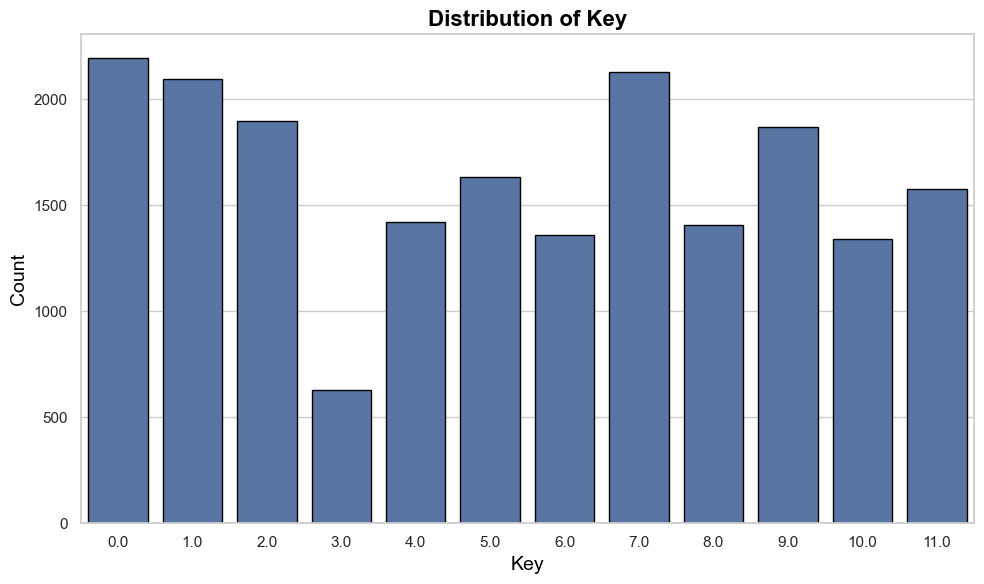

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Key', data=df, edgecolor='black')

plt.title('Distribution of Key', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Key', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')

plt.tight_layout()
plt.show()
